In [97]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Create your df here:
df = pd.read_csv("profiles.csv")

#Explore the data
print(df.info())
#print(df.job.head())
#print(df.drinks.head())
#print(df.head())
#print(df.iloc[0])
print(df.age.mean())
body_type = df.body_type.value_counts()
#print(body_type)
#print(diet)
diet = df.diet.value_counts()
drinks = df.drinks.value_counts()
drugs = df.drugs.value_counts()
education = df.education.value_counts()
ethnicity = df.ethnicity.value_counts()
height = df.height.value_counts()
income = df.income.value_counts()
job = df.job.value_counts()
offspring = df.offspring.value_counts()
orientation = df.orientation.value_counts()
pets = df.pets.value_counts()
religion = df.religion.value_counts()
sex = df.sex.value_counts()
sign = df.sign.value_counts()
smokes = df.smokes.value_counts()
speaks = df.speaks.value_counts()
status = df.status.value_counts()
#print(df.essay9.head())
print(sex)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
age            59946 non-null int64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         54458 non-null object
essay1         52374 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49096 non-null object
essay6         46175 non-null object
essay7         47495 non-null object
essay8         40721 non-null object
essay9         47343 non-null object
ethnicity      54266 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            51748 non-null object
last_online    59946 non-null object
location       59946 non-null object
offspring      24385 non-null object
orientation    59946 non-null object
pets

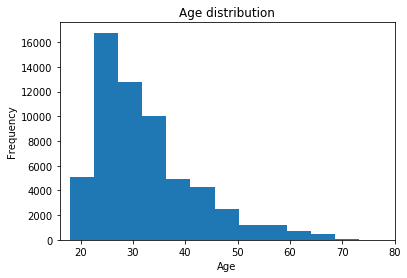

In [76]:
###Visualize some of the data
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.title('Age distribution')
plt.savefig('Age_histo.png')
plt.show()


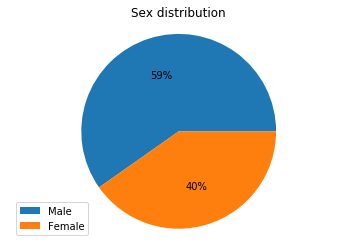

In [96]:
plt.pie(sex, autopct='%d%%')
#plt.xlabel('Sex')
#plt.ylabel('Frequency')
plt.axis('equal')
plt.legend(['Male', 'Female'])
plt.title('Sex distribution')
plt.savefig('Sex_pie.png')
plt.show()

In [78]:
###Formulate a Question
#Can we predict sex with education level and income?
#Can we predict education level with essay text word counts?
#Can we predict the zodiac sign using drinking, smoking, drugs and essays as our features?
##Can we predict drug use with smoking and drinking as features?
##Can we predict drug use with word length?

In [79]:
###Augment your data
##drinks_code
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)
##smokes_code
smoke_mapping = {"no": 0, "sometimes": 1, "when drinking": 2, "yes": 3, "trying to quit": 4}
df["smokes_code"] = df.smokes.map(smoke_mapping)
##drugs_code
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["drugs_code"] = df.drugs.map(drugs_mapping)
##sex_code
sex_mapping = {"f": 0, "m": 1}
df["sex_code"] = df.sex.map(sex_mapping)
##signs_code
#signs answers
signs_answ = df.sign.unique()
signs_answ = signs_answ.tolist()
def zodiac(sign_answer):
    words = str(sign_answer).split()
    if words[0] == 'capricorn':
        return 1
    elif words[0] == 'aquarius':
        return 2
    elif words[0] == 'pisces':
        return 3
    elif words[0] == 'aries':
        return 4
    elif words[0] == 'taurus':
        return 5
    elif words[0] == 'gemini':
        return 6
    elif words[0] == 'cancer':
        return 7
    elif words[0] == 'leo':
        return 8
    elif words[0] == 'virgo':
        return 9
    elif words[0] == 'libra':
        return 10
    elif words[0] == 'scorpio':
        return 11
    elif words[0] == 'sagittarius':
        return 12
    
#print(type(signs_answ))
#print(signs_answ)
#print(zodiac(signs_answ))
#signs_mapping = {'leo': 8, "leo and it's fun to think about": 8, "leo but it doesn't matter": 8, "leo and it matters a lot": 8, 'libra': 10, "libra and it's fun to think about": 10, "libra but it doesn't matter": 10, "libra and it matters a lot": 10, 'cancer': 7, "cancer and it's fun to think about": 7, "cancer but it doesn't matter": 7, "cancer and it matters a lot": 7, 'virgo': 9, "virgo and it's fun to think about": 9, "virgo but it doesn't matter": 9, "virgo and it matters a lot": 9, 'scorpio': 11, "scorpio and it's fun to think about": 11, "scorpio but it doesn't matter": 11, "scorpio and it matters a lot": 11, 'gemini': 6, "gemini and it's fun to think about": 6, "gemini but it doesn't matter": 6, "gemini and it matters a lot": 6, 'taurus': 5, "taurus and it's fun to think about": 5, "taurus but it doesn't matter": 5, "taurus and it matters a lot": 5, 'aries': 4, "aries and it's fun to think about": 4, "aries but it doesn't matter": 4, "aries and it matters a lot": 4, 'pisces': 3, "pisces and it's fun to think about": 3, "pisces but it doesn't matter": 3, "pisces and it matters a lot": 3, 'aquarius': 2, "aquarius and it's fun to think about": 2, "aquarius but it doesn't matter": 2, "aquarius and it matters a lot": 2, 'sagittarius': 12, "sagittarius and it's fun to think about": 12, "sagittarius but it doesn't matter": 12, "sagittarius and it matters a lot": 12, 'capricorn': 1, "capricorn and it's fun to think about": 1, "capricorn but it doesn't matter": 1, "capricorn and it matters a lot": 1 }
#df["sign_code"] = df.sign.map(signs_mapping)
print(df.head())
print(df.sex_code.value_counts())


   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [100]:
##essays
#one string
essay_cols = ["essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", "essay9"]
#removing the NaNs
all_essays = df[essay_cols].replace(np.nan, "", regex=True)
#combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ''.join(x), axis=1)
df["essay_len"] = all_essays.apply(lambda x: len(x))
#average word length
def av_word(inp):
    words = inp.split()
    if len(words) != 0:
        average = sum(len(word) for word in words) / len(words)
        return average
    else:
        return 0
df["avg_word_length"] = all_essays.apply(lambda x: av_word(x))

#frequency "I" or "me"
def frequency(inp):
    freq = 0
    words = inp.split()
    words
    for word in words:
        word = word.strip(".")
        word = word.strip(",")
        word = word.strip("!")
        word = word.strip("?")
        if word == "I" or word == "me" or word == "Me":
            freq += 1
    return freq
df["frequency"] = all_essays.apply(lambda x: frequency(x))
#zodiac column
df["zodiac_code"] = df.sign.apply(lambda x:zodiac(x))



print(df.head())


   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

C:\Users\KathrinAurelio\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\KathrinAurelio\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


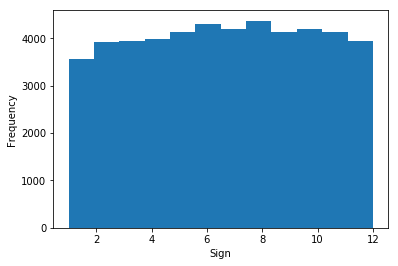

In [101]:
###Visualize some of the data - zodiac
plt.hist(df.zodiac_code, bins=12, range=(1, 12))
plt.xlabel("Sign")
plt.ylabel("Frequency")

#plt.title('Age distribution')
#plt.savefig('Age_histo.png')
plt.show()

In [82]:
###Normalize your data
from sklearn.preprocessing import MinMaxScaler
feature_data = df[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length']]
x = feature_data.dropna().values
#print(type(x))
#print(x)
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
#print(x_scaled)

feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)
#print(feature_data.head())
#print(df.head())
##Normalize data for Zodiac question
feature_data_zodiac = df[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length', 'zodiac_code']]
#df for zodiac
feature_data_zodiac = feature_data_zodiac.dropna()
normalize_features = feature_data_zodiac[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length']]
x_zodiac = normalize_features.values
min_max_scaler_zodiac = MinMaxScaler()
x_zodiac_scaled = min_max_scaler_zodiac.fit_transform(x_zodiac)


print(x_zodiac_scaled)



[[0.25       0.4        0.         0.0273715  0.07090336]
 [0.         0.6        0.5        0.01499979 0.06707875]
 [0.         0.4        0.         0.00743757 0.08530405]
 ...
 [0.         0.6        0.5        0.03103835 0.08885626]
 [0.         0.         0.         0.01915486 0.0776699 ]
 [1.         0.4        1.         0.02066107 0.07147234]]


In [83]:
###Use Classification Techniques
##K-Nearest Neighbor
#Can we predict sex with education level and income?
#Can we predict education level with essay text word counts?
#Can we predict the zodiac sign using drinking, smoking, drugs and essays as our features?
##Can we predict drug use with smoking and drinking as features?
##Can we predict drug use with word length?
from sklearn.neighbors import KNeighborsClassifier
classifier_z = KNeighborsClassifier(n_neighbors=5)
labels_z = list(feature_data_zodiac['zodiac_code'])
points_z = list(x_zodiac_scaled)

#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(points_z, labels_z, train_size=0.8, test_size=0.2, random_state=100)

#fit the data
classifier_z.fit(x_train, y_train)
guesses = classifier_z.predict(x_test)
#print(guesses)
#print(y_test)

In [84]:
###Analyze Acuracy, Precision and Recall
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_zodiac_k5 = accuracy_score(y_test, guesses)
recall_zodiac_k5 = recall_score(y_test, guesses, average='macro')
precision_zodiac_k5 = precision_score(y_test, guesses, average='macro')
print(accuracy_zodiac_k5)
#validating the model for different ks
accuracy_z = []
k_z = []

def knn_zodiac(points, labels, k):
    classifier = KNeighborsClassifier(n_neighbors=k)
    x_train, x_test, y_train, y_test = train_test_split(points, labels, train_size=0.8, test_size=0.2, random_state=100)
    classifier.fit(x_train, y_train)
    guesses = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, guesses)
    return accuracy

for i in range(1, 200, 2):
    accuracy_z.append(knn_zodiac(points_z, labels_z, i))
    k_z.append(i)
    

print(accuracy_z)
print(k_z)

0.07998313185268485
[0.08574641551869552, 0.07478211976384594, 0.07998313185268485, 0.08138881079561427, 0.07913972448692719, 0.08138881079561427, 0.08181051447849311, 0.08504357604723081, 0.08420016868147315, 0.08546527973010964, 0.08560584762440258, 0.08560584762440258, 0.0853247118358167, 0.08841720551026146, 0.08630868709586731, 0.08673039077874613, 0.08644925499016025, 0.08799550182738262, 0.08799550182738262, 0.08574641551869552, 0.08518414394152375, 0.08490300815293787, 0.08448130447005904, 0.08124824290132134, 0.08504357604723081, 0.08391903289288727, 0.08546527973010964, 0.08518414394152375, 0.08616811920157436, 0.08321619342142254, 0.0833567613157155, 0.08743323025021085, 0.08546527973010964, 0.08588698341298848, 0.0843407365757661, 0.08490300815293787, 0.08405960078718021, 0.08363789710430138, 0.08265392184425077, 0.08476244025864492, 0.08462187236435198, 0.08223221816137194, 0.08026426764127073, 0.08349732921000844, 0.08476244025864492, 0.08616811920157436, 0.08363789710430

<function matplotlib.pyplot.show>

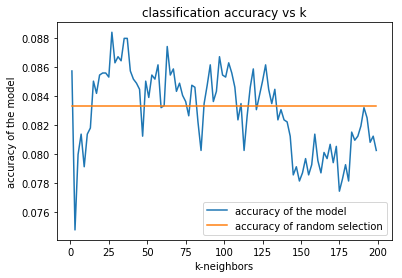

In [85]:
##Graphs for comparing accuracy, precision and recall for KNN zodiac
x_acc_zodiac = k_z
y_acc_zodiac = accuracy_z
plt.plot(x_acc_zodiac, y_acc_zodiac)
# Accuracy by randomly selected sign expected to be 1/12
x_values_acc_ran = k_z
y_values_acc_ran = [1/12]*len(k_z)
plt.plot(x_values_acc_ran, y_values_acc_ran)

plt.xlabel('k-neighbors')
plt.ylabel('accuracy of the model')
plt.title('classification accuracy vs k')
plt.legend(['accuracy of the model', 'accuracy of random selection'])
plt.savefig('clas_accuracy_vs_k_zodiac.png')
plt.show

In [86]:
##Can we predict the gender with the essay length and income?
feature_data_essay = df[['sex_code', 'essay_len', 'income']]
#print(feature_data_essay.income.value_counts())
#normalizing
normalize_feature_e = feature_data_essay[['essay_len', 'income']]
x_essay = normalize_feature_e.values
min_max_scaler_essay = MinMaxScaler()
x_essay_scaled = min_max_scaler_essay.fit_transform(x_essay)

points_essay = list(x_essay_scaled)
labels_essay = list(feature_data_essay.sex_code)
#print(labels_essay)
#Classifier KNN
classifier_e = KNeighborsClassifier(n_neighbors=5)

#split
xe_train, xe_test, ye_train, ye_test = train_test_split(points_essay, labels_essay, train_size=0.8, test_size=0.2, random_state=100)

#fit
classifier_e.fit(xe_train, ye_train)
#predict
guesses_e = classifier_e.predict(xe_test)

#validate
accuracy_essay_k5 = accuracy_score(ye_test, guesses_e)
recall_essay_k5 = recall_score(ye_test, guesses_e)
precision_essay_k5 = precision_score(ye_test, guesses_e)
#print(accuracy_essay_k5)

#different ks
def knn_essay_acc(points, labels, k):
    classifier = KNeighborsClassifier(n_neighbors=k)
    x_train, x_test, y_train, y_test = train_test_split(points, labels, train_size=0.8, test_size=0.2, random_state=100)
    classifier.fit(x_train, y_train)
    guesses = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, guesses)
    return accuracy
                
def knn_essay_rec(points, labels, k):
    classifier = KNeighborsClassifier(n_neighbors=k)
    x_train, x_test, y_train, y_test = train_test_split(points, labels, train_size=0.8, test_size=0.2, random_state=100)
    classifier.fit(x_train, y_train)
    guesses = classifier.predict(x_test)
    recall = recall_score(y_test, guesses)
    return recall
              
def knn_essay_pre(points, labels, k):
    classifier = KNeighborsClassifier(n_neighbors=k)
    x_train, x_test, y_train, y_test = train_test_split(points, labels, train_size=0.8, test_size=0.2, random_state=100)
    classifier.fit(x_train, y_train)
    guesses = classifier.predict(x_test)
    precision = precision_score(y_test, guesses)
    return precision

accuracy_essay = []    
recall_essay = []
precision_essay = []
for i in range(1, 100, 2):
    accuracy_essay.append(knn_essay_acc(points_essay, labels_essay, i))
    recall_essay.append(knn_essay_rec(points_essay, labels_essay, i))
    precision_essay.append(knn_essay_pre(points_essay, labels_essay, i))
    
#print(precision_essay)
# Accuracy by randomly selected sex expected to be 0.5
    

C:\Users\KathrinAurelio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


<function matplotlib.pyplot.show>

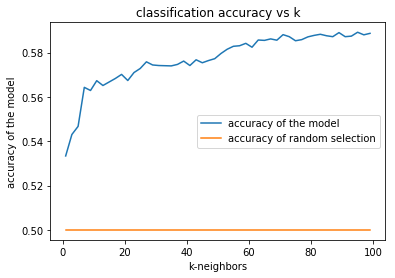

In [87]:
##Graphs for comparing accuracy, precision and recall for KNN essay
x_values_accuracy = range(1, 100, 2)
y_values_accuracy = accuracy_essay
plt.plot(x_values_accuracy, y_values_accuracy)
x_values_accuracy_ran = range(1, 100, 2)
y_values_accuracy_ran = [1/2]*50
plt.plot(x_values_accuracy_ran, y_values_accuracy_ran)

#x_values_precision = range(1, 100, 2)
#y_values_precision = precision_essay
#plt.plot(x_values_precision, y_values_precision)
#x_values_recall = range(1, 100, 2)
#y_values_recall = recall_essay
#plt.plot(x_values_recall, y_values_recall)
plt.xlabel('k-neighbors')
plt.ylabel('accuracy of the model')
plt.title('classification accuracy vs k')
plt.legend(['accuracy of the model', 'accuracy of random selection'])
plt.savefig('clas_accuracy_vs_k_essay.png')
plt.show

In [88]:
#plt.scatter(feature_data_essay[['essay_len']], feature_data_essay[['income']])
#plt.show

In [89]:
##Classifier SVM
from sklearn.svm import SVC
classfier_svm_e = SVC(gamma = 50, C=100)
#no splitting here - using the same data than with KNN above
xes_train, xes_test, yes_train, yes_test = train_test_split(points_essay, labels_essay, train_size=0.8, test_size=0.2, random_state=80)

#fit
classfier_svm_e.fit(xes_train, yes_train)
#predict
guesses_svm_e = classfier_svm_e.predict(xes_test)
#validate
accuracy_essay_svm = accuracy_score(yes_test, guesses_svm_e)
#recall_essay_svm = recall_score(ye_test, guesses_svm_e)
#precision_essay_svm = precision_score(ye_test, guesses_svm_e)
print(accuracy_essay_svm)
#print(recall_essay_svm)
#print(precision_essay_svm)

#different Cs
def svm_essay_acc(points_train, labels_train, points_test, labels_test, c):
    classifier = SVC(C=c)
    classifier.fit(points_train, labels_train)
    guesses = classifier.predict(points_test)
    accuracy = accuracy_score(labels_test, guesses)
    return accuracy

#print('start')
#print(svm_essay_acc(xe_train, ye_train, xe_test, ye_test, 50))
#print('end')


accuracy_essay_svm_loop = []
c=0.01
#for i in range(100):
    #accuracy_essay_svm_loop.append(svm_essay_acc(xe_train, ye_train, xe_test, ye_test, c))
    #print(svm_essay_acc(xe_train, ye_train, xe_test, ye_test, c))
    #c+=0.5




0.6012510425354463


In [90]:
#different Cs - at the moment no point. Accuracy is always the same no matter which C
def svm_essay_acc(points_train, labels_train, points_test, labels_test, c):
    classifier = SVC(C=c)
    classifier.fit(points_train, labels_train)
    guesses = classifier.predict(points_test)
    accuracy = accuracy_score(labels_test, guesses)
    return accuracy

print('start')
print(svm_essay_acc(xes_train, yes_train, xes_test, yes_test, 0.1))
print('end')


accuracy_essay_svm_loop = []
c=0.01
#for i in range(100):
    #accuracy_essay_svm_loop.append(svm_essay_acc(xe_train, ye_train, xe_test, ye_test, c))
    #print(svm_essay_acc(xe_train, ye_train, xe_test, ye_test, c))
    #c+=0.5

start
0.6012510425354463
end


In [98]:
##Classifier SVM for zodiac
classfier_svm_z = SVC(gamma = 1, C=0.01)
#no splitting here - using the same data than with KNN above:
#x_train, x_test, y_train, y_test = train_test_split(points_z, labels_z, train_size=0.8, test_size=0.2, random_state=100)

#fit
classfier_svm_z.fit(x_train, y_train)
#predict
guesses_svm_z = classfier_svm_z.predict(x_test)
#validate
accuracy_zodiac_svm = accuracy_score(y_test, guesses_svm_z)

print(accuracy_zodiac_svm)




0.08869834129884735


In [105]:
###Linear Regression
##Can we predict age with average word length in essays?
from sklearn.linear_model import LinearRegression
#Preparing the data

x_lr_age =df[['avg_word_length']]
y_lr_age = df[['age']]

#print(x_lr_age.head())
#print(y_lr_age.head())
#Creating the model
lr_age = LinearRegression()
#split
x_age_train, x_age_test, y_age_train, y_age_test = train_test_split(x_lr_age, y_lr_age, train_size=0.8, test_size=0.2)
#fit
lr_age.fit(x_age_train, y_age_train )
#predict
y_age_predicted = lr_age.predict(x_age_test)
#print(y_age_predicted)
#print('start')
#Visualize
#plt.scatter(x_lr_age, y_lr_age, alpha=0.4 )
#plt.xlabel('Average word length')
#plt.ylabel('Age')
#plt.title('Average word length against age')
#plt.show
#print('end')
print(lr_age.score(x_lr_age, y_lr_age))

1.8190642456006323e-05


start


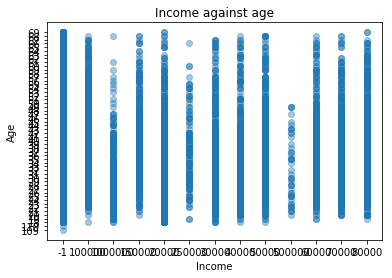

end
-3.3842598599065354e-06


In [106]:
###Linear Regression
##Can we predict age with income?

#Preparing the data

x_lr_age_i =df[['income']]
y_lr_age_i = df[['age']]

#Creating the model
lr_age_i = LinearRegression()
#split
x_age_i_train, x_age_i_test, y_age_i_train, y_age_i_test = train_test_split(x_lr_age_i, y_lr_age_i, train_size=0.8, test_size=0.2)
#fit
lr_age_i.fit(x_age_i_train, y_age_i_train )
#predict
y_age_i_predicted = lr_age_i.predict(x_age_i_test)
#print(y_age_predicted)
print('start')
#Visualize
plt.scatter(x_lr_age_i, y_lr_age_i, alpha=0.4 )
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Income against age')
plt.show()
print('end')
print(lr_age_i.score(x_lr_age_i, y_lr_age_i))

In [112]:
###K-Nearest Neighbor Regressor
##Can we predict age with average word length in essays?
from sklearn.neighbors import KNeighborsRegressor
#Preparing the data

x_knr_age =df[['avg_word_length']]
y_knr_age = df[['age']]

#print(x_lr_age.head())
#print(y_lr_age.head())
#Creating the model
knr_age = KNeighborsRegressor(n_neighbors=3, weights="distance")
#split
x_knr_age_train, x_knr_age_test, y_knr_age_train, y_knr_age_test = train_test_split(x_knr_age, y_knr_age, train_size=0.8, test_size=0.2)
#fit
knr_age.fit(x_knr_age_train, y_knr_age_train )
#predict
y_knr_age_predicted = knr_age.predict(x_knr_age_test)
#print(y_age_predicted)
#print('start')
#validation: Accuracy etc are classification metrics. They can't be used with regression!
val_knnr_age = knr_age.score(x_knr_age, y_knr_age)
#Visualize
#plt.scatter(x_knr_age, y_knr_age, alpha=0.4 )
#plt.xlabel('Average')
#plt.ylabel('Age')
#plt.title('Average against age')
#plt.show()
#print('end')
print(val_knnr_age)

0.41867642739334776


In [113]:
#Multilinear regression
##Can we predict age with average word length and length in essays?